# 201600779 김영민

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import warnings
warnings.filterwarnings('ignore')

#1

1-1

In [54]:
data=pd.read_csv('/content/sample_data/armybodycopy.csv',encoding='cp949')

In [55]:
print(data.shape)

(135670, 10)


1-2

In [56]:
df=data[['신장 센티미터','소매길이 센티미터']]

Text(0, 0.5, 'long')

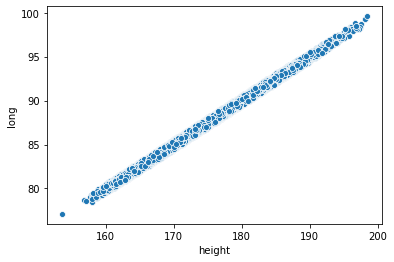

In [57]:
import seaborn as sns
sns.scatterplot(data=df,x='신장 센티미터',y='소매길이 센티미터')
plt.xlabel('height')
plt.ylabel('long')

1-3

In [58]:
train = data.iloc[:100000]
test = data.iloc[100000:]

In [59]:
train.tail(1)

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
99999,100000,20160125,95.0,86.6,172.9,79.5,78.2,57.3,26.0,65.9


In [60]:
test.tail(1)

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
135669,135670,20160704,101.8,87.0,174.8,105.9,78.4,61.7,26.9,90.6


1-4

In [61]:
num_epoch = 1000
model = nn.Linear(1,1)
print(model)
loss_func = nn.L1Loss() # L1 손실이 MAE임
optimizer = optim.SGD(model.parameters(),lr=0.001)

Linear(in_features=1, out_features=1, bias=True)


1-5

In [62]:
x= torch.tensor(train['몸무게 킬로그램'].values,dtype=torch.float).reshape(-1,1)
y= torch.tensor(train['허리 둘레 센티미터'].values,dtype=torch.float).reshape(-1,1)

In [63]:

loss_arr =[]

label = y
num_epoch = 1000

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output,label)
    loss.backward()

    optimizer.step()
    

    loss_arr.append(loss.detach().numpy())

Text(0.5, 1.0, 'L1 LOSS graph')

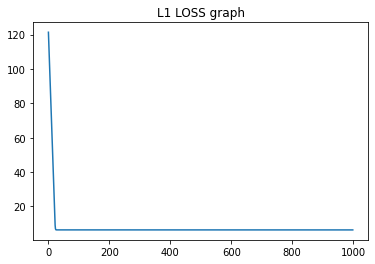

In [69]:
plt.plot(loss_arr)
plt.title('L1 LOSS graph')

1-6

In [65]:
model2 = nn.Sequential(nn.Linear(1,10),nn.Linear(10,5),nn.Linear(5,1))
optimizer2=optim.Adam(model2.parameters(),lr=0.0001)

In [66]:

loss_func2= nn.MSELoss()
loss_arr2 =[]

label = y
num_epoch = 1000

for i in range(num_epoch):
    optimizer2.zero_grad()
    output = model2(x)

    loss = loss_func2(output,label)
    loss.backward()

    optimizer2.step()
    

    loss_arr2.append(loss.detach().numpy())

Text(0.5, 1.0, 'MSE LOSS graph')

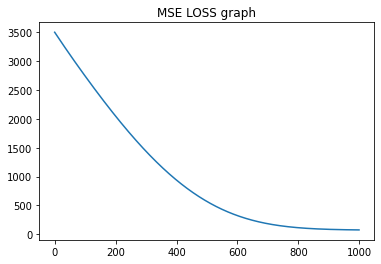

In [68]:
plt.plot(loss_arr2)
plt.title("MSE LOSS graph")

# 2

In [20]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**3)
y_noise = y + noise

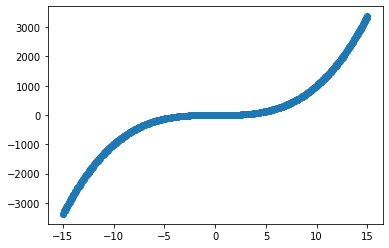

In [21]:
plt.scatter(x,y)

In [22]:
model_nn = nn.Sequential(
          nn.Linear(1,50),
          nn.ReLU(),
          nn.Linear(50,100),
          nn.ReLU(),
          nn.Linear(100,1)
      )

loss_func = nn.L1Loss()
optimizer = optim.Adam(model_nn.parameters(),lr=0.0002)
print(model_nn)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)


In [23]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model_nn(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

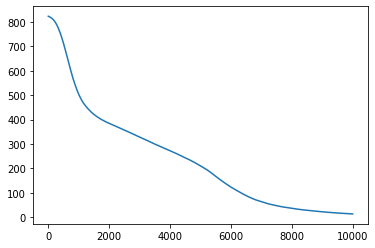

In [24]:
plt.plot(loss_array)

2-4

In [25]:
loss_func2 =nn.MSELoss()

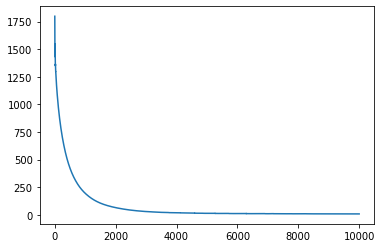

In [26]:
loss_array2 = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model_nn(x)
    
    loss = loss_func2(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array2.append(loss)
plt.plot(loss_array2)

- 딱히 수정할 필요없이 잘 나왔다.

# Bonus 3번

In [27]:
mnist_train = dset.FashionMNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.FashionMNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Extracting ../FashionMNIST/raw/train-images-idx3-ubyte.gz to ../FashionMNIST/raw



Extracting ../FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../FashionMNIST/raw


Extracting ../FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../FashionMNIST/raw


Extracting ../FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../FashionMNIST/raw
Processing...
Done!


In [28]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000


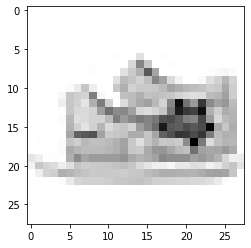

In [29]:
some_digit_image = mnist_test.__getitem__(mnist_test.__len__()-1)[0].reshape(28,28) # 마지막 출력
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation='nearest')

3-2,3

torch.Size([1, 3, 28, 28])


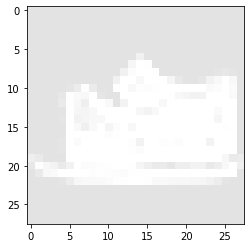

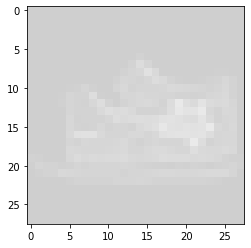

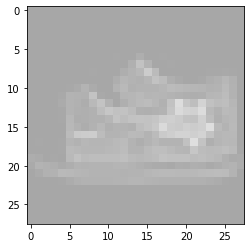

In [30]:

image,label = mnist_test[mnist_test.__len__()-1]
image = image.view(-1,image.size()[0],image.size()[1],image.size()[2])
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1)
output = conv_layer(image)

print(output.size())

# 출력의 각 채널별 이미지를 띄워봅니다. 
for i in range(output.size()[1]):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray',vmin=-1,vmax=1)
    plt.show()

3-4

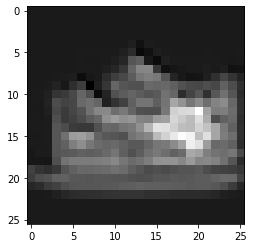

커널 사이즈가 3인 경우 결과값의 크기:torch.Size([1, 1, 26, 26])


In [31]:
# 커널 사이즈를 3로 하는 경우
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("커널 사이즈가 3인 경우 결과값의 크기:{}".format(output.size()))

3-5

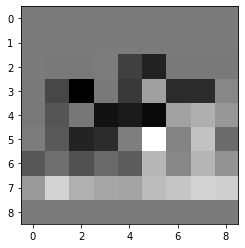

스트라이드가 3인 경우 결과값의 크기:torch.Size([1, 1, 9, 9])


In [32]:
conv_layer = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print("스트라이드가 3인 경우 결과값의 크기:{}".format(output.size()))

3-6

In [33]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),             # [batch_size,1,28,28] -> [batch_size,16,24,24]
            nn.ReLU(),                                                          # 필터의 개수는 1개(흑백이미지)에서 16개로 늘어나도록 임의로 설정했습니다. 
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),            # [batch_size,16,24,24] -> [batch_size,32,20,20]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                               # [batch_size,32,20,20] -> [batch_size,32,10,10]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),          # [batch_size,32,10,10] -> [batch_size,64,6,6]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                # [batch_size,64,6,6] -> [batch_size,64,3,3]
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(64*3*3,100),                                              # [batch_size,64*3*3] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                   # [batch_size,100] -> [batch_size,10]
        )       
        
    def forward(self,x):
        out = self.layer(x)                                                     # self.layer에 정의한 Sequential의 연산을 차례대로 다 실행합니다.
        out = out.view(batch_size,-1)                                           # view 함수를 이용해 텐서의 형태를 [batch_size,나머지]로 바꿔줍니다. 
                                                                                # ex) 2x3 형태였던 텐서를 .view(1,-1) 해주면 1x6의 형태로 바뀝니다. .view(3,-1)이면 3x2로 바뀜.
                                                                                # 만약 전체 텐서의 크기가 batch_size로 나누어 떨어지지 않으면 오류가 납니다.
        out = self.fc_layer(out)
        return out

In [37]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10
train_loader = DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [38]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델을 지정한 장치로 올립니다.
model = CNN().to(device)

# 손실함수로는 크로스엔트로피를 사용합니다.
loss_func = nn.CrossEntropyLoss()

# 최적화함수로는 Adam을 사용합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

cuda:0


In [39]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.2974, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5475, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3913, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2899, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2356, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2681, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2670, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1379, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1750, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1523, device='cuda:0', grad_fn=<NllLossBackward>)


Text(0.5, 1.0, 'loss error plot')

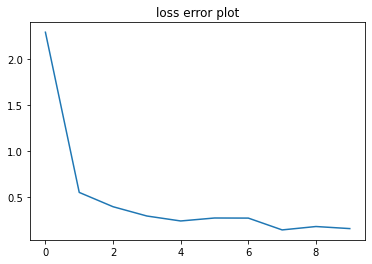

In [40]:
plt.plot(loss_arr)
plt.title("loss error plot")

In [41]:
correct = 0
total = 0
tmp=[]

for i in range(5):
  with torch.no_grad():
    for image,label in test_loader:
        x = image.to(device)
        y_= label.to(device)

        output = model.forward(x)
        _,output_index = torch.max(output,1)

        total += label.size(0)
        correct += (output_index == y_).sum().float()

    print("Accuracy of Test Data: {}".format(100*correct/total))
    tmp.append(100*correct/total)

Accuracy of Test Data: 90.83533477783203
Accuracy of Test Data: 90.83533477783203
Accuracy of Test Data: 90.83534240722656
Accuracy of Test Data: 90.83533477783203
Accuracy of Test Data: 90.83534240722656


Text(0.5, 1.0, 'accuracy graph')

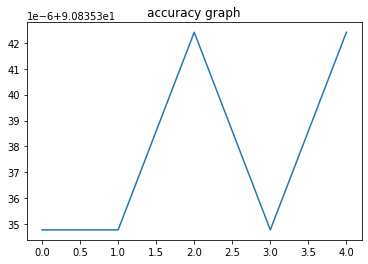

In [53]:
for i in range(len(tmp)):
  tmp[i] = float(tmp[i])
plt.plot(tmp)
plt.title("accuracy graph")